In [1]:
!pip install pandas
!pip install tensorflow

In [2]:
!pip install tensorflow-datasets

In [3]:
import shutil 
import pandas as pd

In [7]:
import os
import copy
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm
import glob
import numpy as np
import tensorflow as tf
from skimage.io import imread, imsave
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn import svm
from PIL import Image
import random

import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [8]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [9]:
train_dataset = '/Users/ericyao/Documents/AARD/Lung/archive/raw_png/Training'
testing_dataset = '/Users/ericyao/Documents/AARD/Lung/archive/raw_png/Testing'

In [10]:
img_paths = glob.glob(os.path.join(train_dataset, '*/*.png'))
parent_names = [os.path.basename(os.path.abspath(os.path.join(p, os.pardir))) for p in img_paths]
labels = np.asarray([0 if p == '0' else 1 if p == '1' else 2 if p == '2' 
                    else 3 for p in parent_names])
imgs = np.asarray([imread(p) for p in img_paths])
len(img_paths)

/var/folders/nz/nbjnbmrx2zv9sqt5nsvq53v80000gn/T/ipykernel_1879/3432833017.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imgs = np.asarray([imread(p) for p in img_paths])


3850

In [11]:
x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size = 0.25, random_state = 1)

In [12]:
y_test

array([2, 0, 1, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 3, 0,
       0, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 1, 0, 0, 2, 0,
       2, 2, 0, 2, 3, 2, 1, 2, 2, 2, 1, 2, 1, 0, 3, 1, 0, 0, 2, 3, 2, 1,
       0, 0, 1, 3, 2, 2, 1, 1, 1, 1, 0, 0, 2, 3, 2, 1, 3, 1, 1, 1, 3, 2,
       2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 3, 2, 2, 3, 2, 1, 0,
       2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 3,
       0, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 3,
       1, 0, 3, 2, 1, 3, 2, 0, 0, 3, 3, 0, 1, 2, 1, 2, 3, 1, 3, 1, 3, 1,
       3, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 0, 3, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 3, 0, 0, 3, 2, 2, 1, 2, 0, 3, 3, 1, 2, 3, 1, 1, 1, 1, 0, 1, 2,
       1, 2, 3, 1, 2, 3, 3, 2, 2, 3, 3, 2, 1, 3, 0, 3, 3, 0, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 1, 3, 3, 3, 2, 1, 0, 3, 1, 2, 2, 2, 2, 1, 3, 0, 1,
       3, 3, 1, 0, 0, 0, 3, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 3, 3, 1,
       1, 1, 1, 1, 1, 3, 2, 3, 1, 0, 0, 0, 2, 0, 3,

In [13]:
train_datagen = ImageDataGenerator(rotation_range = 20)
test_datagen = ImageDataGenerator()

In [14]:
trdata = ImageDataGenerator(rotation_range=20)
traindata = trdata.flow_from_directory("/Users/ericyao/Documents/AARD/Lung/archive/raw_png/Training",target_size=(224,224))
tsdata = ImageDataGenerator(rotation_range=20)
testdata = tsdata.flow_from_directory("/Users/ericyao/Documents/AARD/Lung/archive/raw_png/Testing", target_size=(224,224))

Found 3850 images belonging to 4 classes.
Found 2049 images belonging to 4 classes.


In [15]:
from tensorflow.keras.applications.resnet import ResNet50

In [16]:
model = tf.keras.models.Sequential([
    ResNet50(weights='imagenet', input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4,activation = "softmax")  
])

2022-08-14 18:22:19.526046: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 25,640,716
Trainable params: 25,587,596
Non-trainable params: 53,120
_________________________________________________________________


In [18]:
from tensorflow.keras.optimizers import Adam

In [19]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(lr=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

/Users/ericyao/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [21]:
mc = ModelCheckpoint('Resnet.h5', monitor='val_accuracy', mode='acc')

In [22]:
history = model.fit_generator(steps_per_epoch=100, generator=traindata,validation_data= testdata,  validation_steps= 10,epochs=1, callbacks=[mc, es])  

/var/folders/nz/nbjnbmrx2zv9sqt5nsvq53v80000gn/T/ipykernel_1879/2001349354.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(steps_per_epoch=100, generator=traindata,validation_data= testdata,  validation_steps= 10,epochs=1, callbacks=[mc, es])


100/100 [==============================] - ETA: 0s - loss: 1.3426 - acc: 0.4403 

/Users/ericyao/opt/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


100/100 [==============================] - 1295s 13s/step - loss: 1.3426 - acc: 0.4403 - val_loss: 1.3964 - val_acc: 0.2875


In [23]:
scores = model.predict(testdata, verbose = 1)

65/65 [==============================] - 207s 3s/step


In [24]:
model.evaluate(testdata, verbose = 1)

65/65 [==============================] - 187s 3s/step - loss: 1.3907 - acc: 0.2928


[1.3906699419021606, 0.29282575845718384]

In [25]:
preds = np.argmax(scores, axis = 1)

In [26]:
preds

array([2, 2, 2, ..., 2, 2, 2])

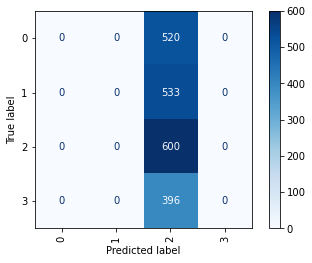

In [27]:
matrix = confusion_matrix(testdata.classes, preds)
disp = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = traindata.class_indices)
disp = disp.plot(cmap = plt.cm.Blues)
plt.xticks(rotation = 90)
plt.show()

In [28]:
print(matrix)

[[  0   0 520   0]
 [  0   0 533   0]
 [  0   0 600   0]
 [  0   0 396   0]]


In [29]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[0].set(xlim=(0, 100), ylim=(0, 2))
    ax[0].set_xlabel('Epochs')
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[1].set(xlim=(0, 100), ylim=(0, 1))
    ax[1].set_xlabel('Epochs')
    ax[0].legend()
    ax[1].legend()

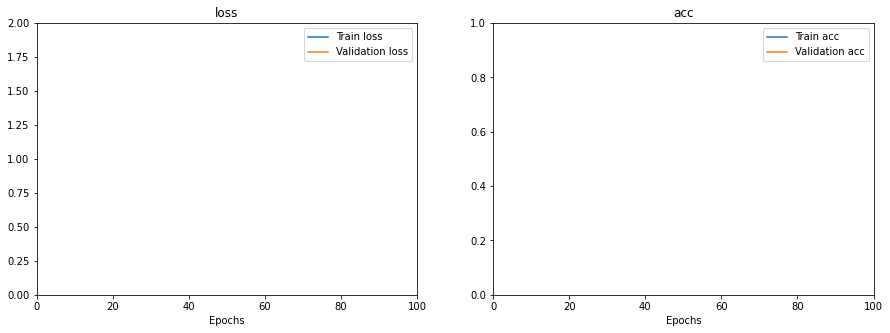

In [30]:
show_final_history(history)